In [2]:
from math import pi, sqrt, exp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fmin
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from dataclasses import dataclass

matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rc('font', size=12)

In [3]:
files = [
    "V-nothing",
    "h-h-h",
    "hwp-qwp-hwp",
]
files.extend([f"hwp-qwp-hwp quarter {a}" for a in ["22-5", "45", "67-5", "90"]])
files.extend([f"h-q{i}-h" for i in [0, 5, 10, 15, 20, 25, 30]])

@dataclass
class FileData:
    n: str
    d: np.array

datas: [FileData] = []
for f in files:
    d = np.genfromtxt(f"lab/inter/{f}.csv", skip_header=15, delimiter=",")
    datas.append(FileData(n=f, d=d[:, 3:].transpose()[0]))

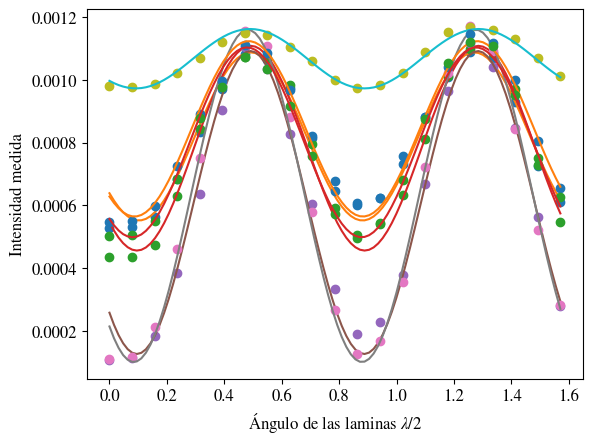

In [5]:
def curve(x, f, x_0, y_0, a):
    return a * np.sin(f * x + x_0) ** 2 + y_0


ini = 0
step = 4.5
x = np.arange(ini, ini + step * 21, step)
x = x * np.pi / 180

visis = []

fig, ax = plt.subplots()

for fd in datas[7:]:
    ax.plot(x, fd.d, "o")

    (f, x_0, y_0, a) = curve_fit(curve, x, fd.d, p0=(3.9, 0, 0.0005, 0.012))[0]

    # find max and min
    max_x = fmin(lambda x: -curve(x, f, x_0, y_0, a), x0=5.2, disp=False)
    max_y = curve(max_x, f, x_0, y_0, a)

    min_x = fmin(lambda x: curve(x, f, x_0, y_0, a), x0=5.6, disp=False)
    min_y = curve(min_x, f, x_0, y_0, a)
    visis.append((max_y - min_y) / (max_y + min_y))

    _x = np.linspace(x[0], x[-1], num=100)
    ax.plot(_x, curve(_x, f, x_0, y_0, a))

plt.xlabel("Ángulo de las laminas $\lambda/2$")
plt.ylabel("Intensidad medida")
plt.savefig(f"lab/inter/plots/super.pdf")

# fig, ax = plt.subplots()
# x = np.arange(0, 35, step=5)
# y = np.array(visis)
# ax.plot(x, y, "o")

# plt.xlabel("Ángulo de las laminas $\lambda/4$")
# plt.ylabel("Visibilidad")
# plt.savefig("lab/inter/plots/visibility_rotation.pdf")

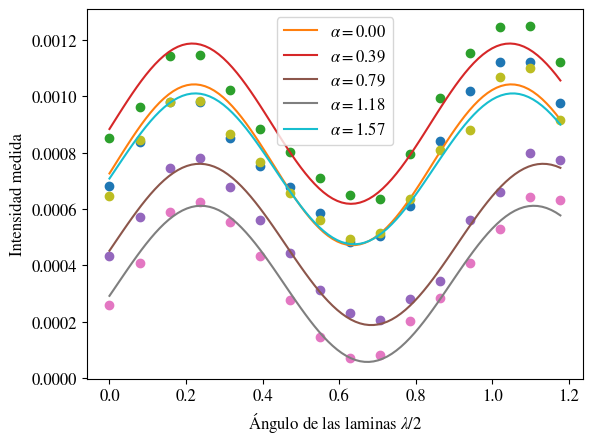

In [22]:
def curve(x, f, x_0, y_0, a):
    return a * np.sin(f * x + x_0) ** 2 + y_0


ini = 0
step = 4.5
x = np.arange(ini, ini + step * 16, step)
x = x * np.pi / 180

qwp_angles = np.arange(0, 5 * np.pi / 8, np.pi / 8)

visis = []

fig, ax = plt.subplots()

for i, fd in enumerate(datas[2:7]):
    ax.plot(x, fd.d, "o")

    (f, x_0, y_0, a) = curve_fit(curve, x, fd.d, p0=(3.9, 0, 0.0005, 0.012))[0]

    # find max and min
    max_x = fmin(lambda x: -curve(x, f, x_0, y_0, a), x0=5.2, disp=False)
    max_y = curve(max_x, f, x_0, y_0, a)

    min_x = fmin(lambda x: curve(x, f, x_0, y_0, a), x0=5.6, disp=False)
    min_y = curve(min_x, f, x_0, y_0, a)
    visis.append((max_y - min_y) / (max_y + min_y))

    _x = np.linspace(x[0], x[-1], num=100)
    ax.plot(_x, curve(_x, f, x_0, y_0, a), label=f"$\\alpha={qwp_angles[i]:.2f}$")

plt.legend()
plt.xlabel("Ángulo de las laminas $\lambda/2$")
plt.ylabel("Intensidad medida")
plt.savefig("lab/inter/plots/super_qwp.pdf")
# plt.close()

# fig, ax = plt.subplots()
# x = np.arange(0, 90 + 22.5, step=22.5)
# y = np.array(visis)
# ax.plot(x, y, "o")

# plt.xlabel("Ángulo de las laminas $\lambda/4$")
# plt.ylabel("Visibilidad")
# plt.savefig("lab/inter/plots/visibility_normal.pdf")

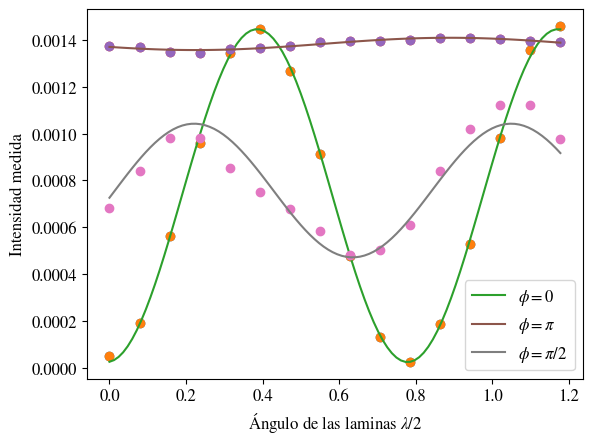

In [20]:
ini = 0
step = 4.5
x = np.arange(ini, ini + step * 16, step)
x = x * np.pi / 180

fig, ax = plt.subplots()

y = datas[0].d[:16]
ax.plot(x, y, "o")
ax.plot(x, y, "o")
(f, x_0, y_0, a) = curve_fit(curve, x, y, p0=(3.9, 0, 0.0005, 0.012))[0]
ax.plot(_x, curve(_x, f, x_0, y_0, a), label="$\phi=0$")

y = datas[1].d[:16]
ax.plot(x, y, "o")
ax.plot(x, y, "o")
(f, x_0, y_0, a) = curve_fit(curve, x, y, p0=(3.9, 0, 0.0005, 0.012))[0]
ax.plot(_x, curve(_x, f, x_0, y_0, a), label="$\phi=\pi$")

y = datas[2].d[:16]
ax.plot(x, y, "o")
(f, x_0, y_0, a) = curve_fit(curve, x, y, p0=(3.9, 0, 0.0005, 0.012))[0]
ax.plot(_x, curve(_x, f, x_0, y_0, a), label="$\phi=\pi/2$")

plt.legend()
plt.xlabel("Ángulo de las laminas $\lambda/2$")
plt.ylabel("Intensidad medida")
plt.savefig("lab/inter/plots/super_vis.pdf")
